In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import conf as conf
import matplotlib.pyplot as plt

CARGANDO CONFIGURACION GENERAL PARA PLOTS


In [3]:
conf.general()  # cargando configuración para plots

## Diferenciación

*Cómo computar una derivada de forma numérica?*

Pudieramos hacerlo partiendo de la definición conocida de derivada
$$
\frac{df(x)}{dx}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h}
$$

Sin embargo, podemos notar que mientras más pequeño es $h$ el numerador es más pequeño, y también el denominador magnificandose así cualquier error que se cometa en la evaluación del numerador.

### Diferencia finitas

A continuación veremos como podemos intentar *remediar* esto usando la serie de Taylor de la función.

#### Aproximaciones en diferencia no centradas

- `Diferencia hacia adelante`

Partamos de la serie de Taylor de la función alrededor del punto $x$ donde queremos computar la derivada

<center><img src="capturas/51.png"></center>

`¿Están de acuerdo con la expresión anterior?` No era 
$$f(\tilde x)=\sum \frac{f^{(n)}(x)}{n!}(\tilde x-x)^n$$

¿Qué paso? Recordamos la definción de $h=\tilde x - x$. Donde $\tilde x$ sería el valor colindante a una distancia $h$ del punto alrededor del cual computamos la serie.

Una vez aclarado lo anterior, consideremos que estamos muy cerca y consideremos solo los primero ordenes:
<center><img src="capturas/53.png"></center>

Esta última expresión es conocida como la `primera aproximación en diferencia hacia adelante`. Como se aprecia solo consiste en usar sólo el resultado del lado derecho para evaluar la derivada, lo que nos deja un `error` del orden $O(h)$ (recordar que $h$ es la distancia entre los dos ptos.)

Graficamente lo que tenemos es que se comienza en $x$ y luego nos movemos en la dirección derecha hasta $x+h$. En otras palabras, la derivada no es más que la pendiente del segmento de recta que conecta $f(x)$ con $f(x+h)$
<center><img src="capturas/54.png"></center>

`COMENTARIO:` La expresión obtenida es *igual* a la definición de derivada, sin embargo producto de que fue obtenida a partir de la serie de Taylor, tenemos una idea del `error` al que corresponde esta aproximación. Es posible que todavía sufra los problemas mencionados anteriormente (numerador pequeño, denominador pequeño), pero al menos ahora tenemos alguna orientación sobre qué tan bien lo estamos haciendo: si la $h$ no es demasiado pequeña (de modo que todavía estemos lejos de las mayores cuestiones de redondeo), reducir a la mitad la $h$ debería duplicar la calidad de la aproximación (en términos absolutos).

- `Diferencia hacia atrás`

Es muy similar al caso anterior, solo que ahora hay que tener presente que $h= x-\tilde x$. Partiendo de la serie de Taylor resultante:

<center><img src="capturas/55.png"></center>

Quedandonos a primer orden llegamos a:
<center><img src="capturas/56.png"></center>

Esta expresión es conocida como `la primera aproximación en diferencias hacia atrás`. 

Se llama diferencia hacia atrás porque comienza en $x$ y luego se mueve en dirección negativa hasta $x − h$. Siendo el resultado la pendiente del segmento de recta que conecta $f(x−h)$ y $f(x)$. Las diferencias hacia adelante y hacia atrás son muy similares.

In [4]:
# implementacion
def difFinNC(f, x, h, der=True, izq=False):
    """
    """
    fd = (f(x+h) - f(x))/h if der else (f(x)-f(x-h))/h 
    return fd

#### Aproximación de diferencia central

Intentemos ahora encontrar una manera de aproximar la derivada usando una diferencia finita, pero con mayor precisión que con la diferencia hacia adelante/hacia atrás. 

Partiendo del desarrollo de Taylor de nuestra función $f$ alrededor del punto $x$ donde queremos conocer la derivada
<center><img src="capturas/57.png"></center>
<center><img src="capturas/58.png"></center>

Notar que esta vez elegimos hacer un paso de tamaño $h/2$ (a diferencia del $h$ de la sección anterior), y que nos *expandimos* tanto hacia adelante como hacia atrás. 

A simple vista podemos ver que si sumamos (restamos) ambas expresiones obtendremos una expresión que contiene sólo derivadas pares (impares). Como estamos interesados en la primera, restando llegamos a:
<center><img src="capturas/59.png"></center>

Lo que conduce a:
<center><img src="capturas/60.png"></center>

Esta expresión es conocida como  `primera aproximación para diferencia central`. Similar a los casos anteriores, acá solo requerimos dos evaluaciones, sin embargo como se aprecia el error es de orden 2 en $h$, y también como esta $h$ es más pequeña que las anteriores tendremos en general un error menor.


Graficamente lo que hacemos es:
<center><img src="capturas/61.png"></center>

Como se aprecia se llama diferencia central porque las dos evaluaciones están en $x − h/2$ y en $x + h/2$, es decir, están centradas en $x$. Claramente, la diferencia central no es otra cosa que la pendiente del segmento de recta que conecta $f(x−h/2)$ y $f(x+h/2)$.


`COMENTARIO 1`: Noten que si escogemos una $h$ no muy pequeña (de modo que todavía estamos lejos de problemas importantes de redondeo), el reducirla a la mitad debería cuadruplicar la calidad de la aproximación (en términos absolutos).


`COMENTARIO 2`: Existe una situación (muy común en la práctica) en la que una aproximación en diferencia central simplemente no es utilizable. Si tenemos un conjunto de $n$ puntos de datos discretos de la forma $(xi, f(xi))$ para $i = 0,1,...,n − 1$ `no podremos usar una diferencia central` para aproximar la derivada en $x_0$ o en $x_{n−1}$. Para cualquiera de los puntos *intermedios* siempre podríamos usar dos evaluaciones (una a la izquierda, otra a la derecha), pero para los dos puntos finales simplemente no tenemos puntos disponibles *en el otro lado*, por lo que es necesaria una diferencia hacia adelante/hacia atrás.

In [5]:
# implementacion
def difFinC(f, x, h):
    """
    """
    fd = (f(x+h/2) - f(x-h/2))/h
    return fd

In [6]:
## Comparemos
f = lambda x: np.sin(x)**(np.tan(x))
df = lambda x: (1+np.log(np.sin(x))/(np.cos(x)**2))*f(x)

x = 0.2  # punto donde computaremos la derivada
hval = [10.**(-i) for i in np.arange(1, 20, 1)]

# implementacion
datD = np.array([difFinNC(f, x, h) for h in hval])
datC = np.array([difFinC(f, x, h) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatC = abs(datC-dfx)

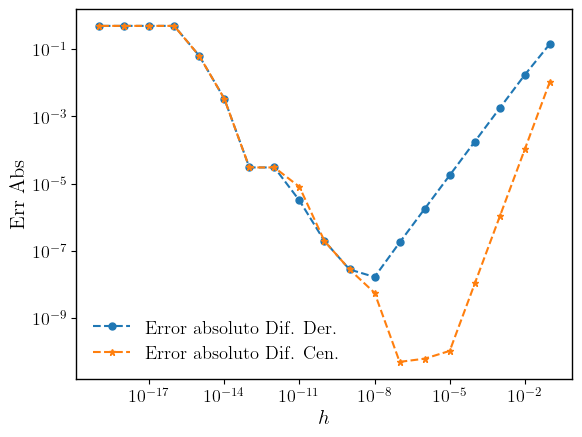

In [7]:
plt.plot(hval, EdatD, ls='--', marker='o', markersize=5, label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', marker='*', markersize=5, label=r'Error absoluto Dif. Cen.')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, fontsize='small')

`Noten` que la parte derecha del gráfico estamos dominados por el error de `truncamiento/aproximación`. En esta región la diferencia central es claramente superior, ya que el error absoluto es consistentemente menor. En esta región, podemos ver:

- cuando $h$ cambia en un orden de magnitud, el error de la diferencia a la derecha cambia en un orden de magnitud, mientras que el error de la diferencia central cambia en dos órdenes de magnitud. 

A medida que nos movemos hacia la izquierda, más allá de cierto punto el error de `redondeo` comienza a dominar y la diferencia hacia adelante es tan buena (o tan mala) como la diferencia central. 

Dejamos de trazar cuando el error es tan grande que fallamos por completo en la evaluación de la derivada.

`Comentario`: los errores de redondeo aparecen del hecho de que los coeficientes se redondean a cero.

`Mejorando la precisión`: ver PDF "Formulae_DerivationDifFinit.pdf"

### Segunda derivada

En la práctica, también necesitamos derivadas de orden superior: la segunda derivada de hecho es una de las más usadas en por los científicos (usualmente todas las ecuaciones de movimiento llegan hasta ese orden. ¿Saben por qué?).

Similar a la primera se pueden establecer expresiones de diferencia hacia adelante, hacia atrás y central para aproximar la segunda derivada. Una manera de calcularla sería simplemente derivando las expresiones anteriores, por ejemplo:
<center><img src="capturas/62.png"></center>

Sin embargo, nuevamente, acá no tendríamos noción del error. 

¿Alguna otra alternativa?

Si recuerdan, anteriormente vimos que si sumamos o restamos las series de Taylor hacia adelante y hacia atrás podiamos obtener terminos con derivadas pares o impares. En nuestro caso enfoquemonos en la diferencia central sumando estas dos expansiones de Taylor y llegar a:

<center><img src="capturas/63.png"></center>

lo que conduce a orden dos a:
<center><img src="capturas/64.png"></center>

Esta expresión es conocida como la `primera aproximación en diferencia central de la segunda derivada`.

`Comentario:` En el caso de quererse calcular las derivadas de orden superior, será necesario combinar suficientes sumas o diferencias de las series de Taylor para cancelar todos los términos no deseados. Por ejemplo, la cuarta derivada $f^{(4)}(x)$ se puede aproximar usando las expresiones:
$$f(x+h/2)+ f(x−h/2)$$

junto con: $$f(x+h)+ f(x−h)$$

### Discretización

Como se discutió al principio en ocasiones no tenemos la posibilidad de cambiar el valor de $h$ y lo que tenemos es un conjunto discretizados de puntos separados a una cierta distancia fija que llamamos $h$. Es decir, contruimos una malla de $n$ puntos
$$x_{i}=a+i h$$
donde $i=0,1,\dots, n-1$ y que va desde $a$, hasta $b$, lo que implica que
$$h=\frac{b-a}{n-1}$$

Como se aprecia la malla tendrá $n-1$ subintervalos y para acceder a cada uno de ellos solo debemos proporcionarle un valor para $i$: $x_{17}=a+17h$

In [8]:
# veamos 
a, n, h = 3., 10, 0.01
xs = [a+i*h for i in range(n)]
xs

[3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09]

Ahora, uno estaría a tentado a reescribir la fórmula como
$$x_{i+1}=x_i+h$$
Matemáticamente parecen equivalentes, esto puesto a que conocemos el valor de $a$ y sumandole $h$ construimos los demás. Sin embargo numericamente ¿cuál creen que sea mejor?

In [9]:
# comparemos q ocurre
a, n, h = 3, 10, 0.01
x = a
xs2 = [x]
for _ in range(n):
    x += h
    xs2.append(x)
xs2

[3,
 3.01,
 3.0199999999999996,
 3.0299999999999994,
 3.039999999999999,
 3.049999999999999,
 3.0599999999999987,
 3.0699999999999985,
 3.0799999999999983,
 3.089999999999998,
 3.099999999999998]

Ven lo que ocurre. 

Lo que está pasando es que cada vez que sumamos $h$ al resultado anterior `estamos cometiendo otro error de suma`. Si lo anterior ocurrió para $10$ puntos, imaginen lo que ocurría para miles, habría un `arrastre sistemático del error`. Ahora, dado que esos puntos son los que se evaluarán en $f(x)$ los resultados obtenido también serán incorrectos y por tanto la derivada.

La primera opción es mejor, puesto que el error en cada paso solo será el de una multiplicación y una suma, no habrá un `arrastre sistemático del error`.

### Reformulación para el caso discreto

Asumamos que queremos calcular la primera derivada de una función $f(x)$ en un punto $x_i$ correspondiente al conjunto:
$${0, 0.05, 0.1, 0.01, 0.2, 0.25, 0.3, \dots, 3.6, 3.65, 3.7, 3.75, 3.8}$$
como se aprecia podemos definir el $h=0.05$.

Si quisieramos calcular la derivada en $x=3.7$, usando la fórmula de diferenciación hacia adelante tendríamos que usar el resultado del vecino más cercano $f(3.75)$,
$$f'(3.7)=\frac{f(3.75)-f(3.7)}{0.05}+O(h).$$

Ahora, si usaramos la fórmula de la diferencia central, necesitaríamos conocer los resulltados para $f(3.675)$ y $f(3.725)$, pero solo tendríamos acceso a $f(3.65), f(3.7)$ y $f(3.75)$. `¿Qué podemos hacer?`

Lo que podemos hacer es tomar una $\tilde h$ en la fórmula de diferencia central para que sea el doble $\tilde h = 2h$. En este caso sería tomar $h = 0,1$. Importante esta $\tilde h$ no tiene nada que ver con la $h$ que se usó para producir la cuadrícula de puntos. Para esta nueva $\tilde h$ la fórmula de diferencia central requiere $f(3,65)$ y $f(3,75)$ lo cual si conocemos.
$$
f'(x)=\frac{f(x+\tilde h)-f(x-\tilde h)}{2\tilde h}+O(\tilde h)
$$

Esta posibilidad es un resultado general, es decir, todas las expresiones del punto medio que hemos visto anteriormente pueden reformularse en una forma que pueda usar evaluaciones de función en una cuadrícula si simplemente tomamos $h \to 2h$. Por ejemplo:
$$
f''(x)=\frac{f(x+ h)+f(x-h)-2f(x)}{h^2}+O(h^2)
$$

### Extrapolación de Richardson

La técnica de la extrapolación de Richardson nos permite mejorar la precisión numérica de nuestros cálculos. Veamos:

Asumamos que se desea obtener el valor de una cierta función $G$ (función analítica o exacta) en un cierto punto. Dicho valor se escribiría en términos de la solución aproximada como
$$G=g(h)+\epsilon(h)$$
donde $g$ es la solución aproximada y depende del paso $h$ y $\epsilon$ el correspondiente error. 

La idea de Richardson consiste en asumir que la forma funcional del error se puede escribir como una polinomio en $h$
$$G=g(h)+A h^{p}+B h^{p+q}+ C h^{p+2q}+\dots$$
donde $A, B, C$ son constantes, el índice $p$ denota el orden del término de error principal y $q$ el incremento en el orden de los términos de error posteriores.

Aplicando esta idea a los pasos $h$ y $h/2$ tendremos
<center><img src="capturas/65.png"></center>

Igualando ambas ecuaciones tendremos:
<center><img src="capturas/66.png"></center>

Lo que nos lleva despejando el término $A h^p$
<center><img src="capturas/67.png"></center>

Finalmente sustituyendo en la expresión principal y quedandonos a orden $h^{p}$ tendremos
<center><img src="capturas/68.png"></center>

Esta ecuación nos daría el valor extrapolado.


Si aplicando esta ecuación al caso de diferenciación hacia adelante tendremos:
<center><img src="capturas/69.png"></center>

Recordar que el error es del orden $h$, lo que implica que $p=1$, lo que nos lleva a

<center><img src="capturas/70.png"></center>

Si comparamos con el PDF, veremos que esta última expresión corresponde a la aproximación de segundo orden de la diferenciación hacia adelante. Es decir, en vez de usar la serie de Taylor podemos usar la extrapolación de Richardson ya que esta nos da siempre el siguiente orden de contribución.

`Ejercicio:`Aplique esta misma idea para la diferenciación central.

Respuesta:
<center><img src="capturas/71.png"></center> <center><img src="capturas/72.png"></center>

In [10]:
# implementación
def RichExt(x, f, g, h, p):
    """
    x -> punto donde queremos conocer la derivada
    g -> solución aproximada 
    f -> función a derivar
    h -> paso
    p -> orden del error principal
    """
    G = (2**p*g(f, x, h/2) - g(f, x, h))/(2**p-1)
    return G

In [11]:
func = lambda x: np.exp(np.sin(2*x))
dfunc = lambda x: 2*np.exp(np.sin(2*x))*np.cos(2*x)

x = 0.5
an = dfunc(x)
hs = [10**(-i) for i in range(1, 7)]
rowf = "{0:1.0e} \t {1:1.16f} \t {2:1.16f}"

print("h \t err-abs-rich-fd  \t abs.-err.-rich-cd")
for h in hs:
    p = 1
    temp0 = RichExt(x, func, difFinNC, h, p)  # difFinNC -> diferencia no central
    temp0 = abs(temp0-an)
    p = 2
    temp1 = RichExt(x, func, difFinC, h, p)  # difFinC -> diferencia central
    temp1 = abs(temp1-an)
    print(rowf.format(h, temp0, temp1))

h 	 err-abs-rich-fd  	 abs.-err.-rich-cd
1e-01 	 0.0259686059827384 	 0.0000098728370874
1e-02 	 0.0002695720500006 	 0.0000000009898602
1e-03 	 0.0000027005434182 	 0.0000000000009619
1e-04 	 0.0000000270109117 	 0.0000000000043667
1e-05 	 0.0000000003389138 	 0.0000000000280513
1e-06 	 0.0000000006941852 	 0.0000000002500959


In [12]:
## Comparemos
f = lambda x: np.sin(x)**(np.tan(x))
df = lambda x: (1+np.log(np.sin(x))/(np.cos(x)**2))*f(x)

x = 0.2
hval = [10.**(-i) for i in np.arange(1, 20, 1)]

# implementacion
datD = np.array([difFinNC(f, x, h) for h in hval])
p = 1
datD2 = np.array([RichExt(x, f, difFinNC, h, p) for h in hval])

datC = np.array([difFinC(f, x, h) for h in hval])
p = 2
datC2 = np.array([RichExt(x, f, difFinC, h, p) for h in hval])

# error absoluto
dfx = df(x)
EdatD = abs(datD-dfx)
EdatD2 = abs(datD2-dfx)
EdatC = abs(datC-dfx)
EdatC2 = abs(datC2-dfx)

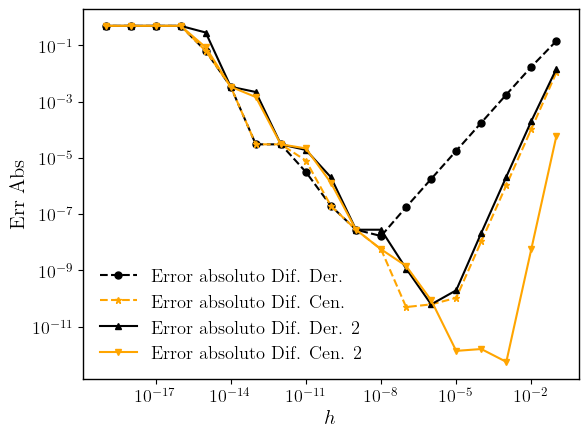

In [13]:
plt.plot(hval, EdatD, ls='--', c='k', marker='o', markersize=5, label=r'Error absoluto Dif. Der.')
plt.plot(hval, EdatC, ls='--', c='orange', marker='*', markersize=5, label=r'Error absoluto Dif. Cen.')

plt.plot(hval, EdatD2, ls='-', c='k', marker='^', markersize=5, label=r'Error absoluto Dif. Der. 2')
plt.plot(hval, EdatC2, ls='-', c='orange', marker='v', markersize=5, label=r'Error absoluto Dif. Cen. 2')

plt.xlabel(r'$h$')
plt.ylabel(r'Err Abs')

plt.xscale('log')
plt.yscale('log')
plt.legend(frameon=False, fontsize='small')

## Ecuaciones diferenciales

### Problemas a resolver

A continuación veremos los métodos numéricos principales que podemos utilizar al enfrentarnos a diferentes tipos de EDO.


- El primer caso y más simple es cuando la EDO tiene la estructura:
$$
y'(x) =  f(x, y(x)), \quad y(a)=c
$$

donde $y'=dy/dx$ y $f(x, y)$ es una función conocida que en general puede ser no lineal y depender tanto de $x, y$, por ejemplo $f(x, y)=3x^2-y^3$. Este tipo de problemas se conoce como `problema del valor inicial`. (Se le conoce así porque se conoce el valor de $y(x)$ en un cierto punto $a$, es decir $y(a)=c$).

- Para EDO de orden superior el problema del valor inicial se generaliza a conocer en el punto $a$ el valor de la función y su derivada, por ejemplo:
$$
y''=f(x, y, y'), \quad y(a)=c, \quad y'(a)=d.
$$

En el problema anterior evaluamos las condiciones en un punto $a$, sin embargo esto no siempre ocurre y podemos tener que estas condiciones estén evaluadas en puntos diferentes, por ejemplo en las fronteras $a, b$:
$$
y''=f(x, y, y'), \quad y(a)=c, \quad y(b)=d.
$$

A este tipo de problemas se les conoce como `problemas del valor en la frontera`. Más adelante veremos como abordarlos.

- Un último problema, (y un poco más dificil de tratar) es cuando el problema anterior se generaliza y no solo depende de $x, y, y'$, sinó de un parámetro $s$, 
$$
y''=f(x, y, y'; s), \quad y(a)=c, \quad y(b)=d.
$$

Este tipo de problemas se le conoce como `problema de autovalores`, donde solo se tendrá una solución no trivial para valores particulares de $s$.

A continuación veremos alguno de los principales métodos para abordar las situaciones anteriores.

## Problema del valor inicial

Como vimos, en este caso nos enfrentamos a EDO con la forma
$$
y'(x) =  f(x, y(x)), \quad y(a)=c
$$

### Euler hacia adelante
El primer método y el más sencillo es el de Euler, el cual está motivado en el método de la diferencia hacia adelante:
$$
y'(x_j) =  \frac{y(x_{j+1})-y(x_j)}{h}-\frac{h^2}{2}y''(\xi_j), 
$$

donde $\xi_j$ es un punto entre $x_j$ y $x_{j+1}$ asociado al máximo valor de la segunda derivada. Ahora, como conocemos que $y'(x_j)=f(x_j, y(x_j))$ podemos usar esta expresión para eliminar la primera derivada y llegar a:
$$
y(x_{j+1}) = y(x_j)+h f(x_j, y(x_j))+\frac{h^2}{2}y''(\xi_j).
$$

Ahora, si asumimos que $h$ es lo suficientemente pequeño, entonces el término $h^2$ no es tan relevante y podemos despreciarlo. Llegándose a:

<center><img src="capturas/EDOfig1.png" width="500" ></center>

Esquemáticamente lo que tenemos es que aproximamos la curva mediante el valor de las pendientes:

<center><img src="capturas/EDOfig2.png" width="500" ></center>


A continuación apliquémos este método a un problema particular, `test equation`:
$$
y'(x)=\mu y(x), \quad y(0)=1,
$$

con $\mu$ una constante real. Cuál es la solución analítica? 

Aplicándo el método de Euler hacia adelante tendremos:
$$
y_{j+1}=(1+\mu h)y_j
$$

Repitiendo este proceso desde $j=0$ hasta $j=n-2$, tendremos:
$$
y_{n-1}=(1+\mu h)^{n-1}y_0=(1+\mu h)^{n-1},
$$

donde hicimos uso de que $y_0=y(0)=1$.

`Notemos que:` Cuando $\mu>0$ de la ecuación anterior podemos inferir que el resultado crece rápidamente (se tendrá algo mayor que $1$), y es lo esperado pues es lo que ocurre de la solución exacta $y(x)=e^{\mu x}$. Por otro lado, notemos que cuando $\mu<0$, de la solución exacta sabemos que el resultado debe ir asintóticamente a cero para valores grandes de $x$, sin embargo, esto puede que no ocurra de nuestra solución aproximada cuando $n$ crece, todo dependerá del valor de $\mu h$. Notemos que para asegurar que $|y_{j+1}|<|y_j|$ debemos asegurarnos de que 
$$
|1+\mu h|<1.
$$

En otras palabras, nuestra condición de `estabilidad` será: $h<\frac{2}{|\mu|}$.

In [14]:
# Implementación
def DEuler(f, data, info=False):
    y0, a, b, npt = data
    
    # h val
    h = (b-a)/(npt-1)
    
    if info:
        print('Valor de h:', h)
    
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    y = y0
    for i, xi in enumerate(xval):
        yval[i] = y
        y += h*f(xi, y)
        
    return xval, yval

Valor de h: 0.1111111111111111
Valor de h: 0.09090909090909091
Valor de h: 0.05263157894736842


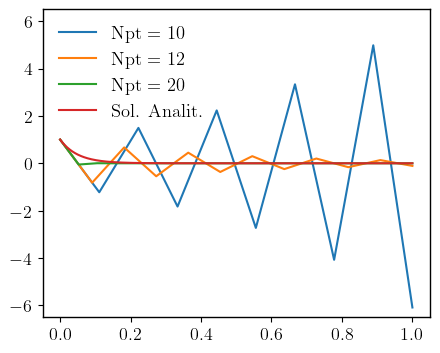

In [15]:
# Ejemplo:

mu = -20

ftest = lambda y, mu: mu*y
Ftest = lambda x, y: ftest(y, mu)

ExSol = lambda x, mu: np.exp(mu*x)

xmin, xmax = 0, 1
ValorN = [10, 12, 20]

y0 = ExSol(xmin, mu)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))

for npt in ValorN:
    data = [y0, xmin, xmax, npt]
    xval, yval = DEuler(Ftest, data, info=True)
    
    ax.plot(xval, yval, label=r'Npt = %d'%npt)
    

xval = np.linspace(xmin, xmax, 1000)
ax.plot(xval,  ExSol(xval, mu), label=r'Sol. Analit.')

ax.set_ylim(-6.5, 6.5)
ax.legend(frameon=False, fontsize='small')

Notese como a medida que aumentamos el número de puntos ($h$ más pequeño) la solución converge a la analítica muy lentamente y dando como resultados  oscilaciones muy pronunciadas. En otras palabras el método de Euler hacia adelante es inestable, debemos considerar una técnica mejor.

### Euler hacia atras

Partiendo del resultado de la derivada hacia atrás tendremos:
$$
y'(x_{j+1}) =  \frac{y(x_{j+1})-y(x_j)}{h}-\frac{h^2}{2}y''(\xi_j).
$$

Despejando $y(x_{j+1})$ tendremos que:
$$
y_{j+1}=y_j+h f(x_{j+1}, y(x_{j+1}))-\frac{h^2}{2}y''(\xi_j),
$$

lo que se aproxima a:

<center><img src="capturas/EDOfig3.png" width="500" ></center>

A primera vista pareciera que el resultado es el mismo. Sin embargo hay una sutil diferencia, a la derecha e izquierda tenemos $y_{j+1}$, lo que llevará a que en cada paso de iteración debamos encontrar raiz de la ecuación:
$$
z = y_j + h f(x_{j+1}, z).
$$

Veamos como se comporta este método aplicado a la ecuación test.


In [16]:
from Complementos.root.BS import roo_Bis

# Implementación método de Euler derecho y izquierdo
def LEuler(f, data, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    y0, a, b, npt = data
    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    sol = lambda z, x, y: z - (y+h*f(x, z))
    
    y = y0
    for i, xi in enumerate(xval):
        yval[i] = y
        sol2 = lambda z: sol(z, xi, y)        
        #print(xi, y)
        y = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv)[0]

    return xval, yval

Valor de h: 0.1111111111111111
Valor de h: 0.09090909090909091
Valor de h: 0.05263157894736842


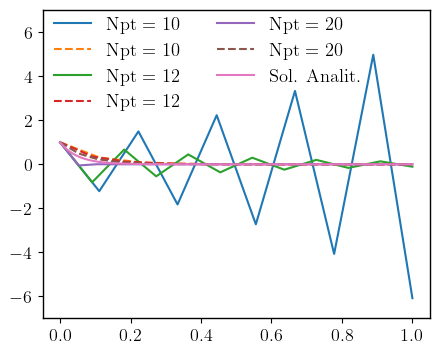

In [17]:
# Ejemplo:

mu = -20

ftest = lambda y, mu: mu*y
Ftest = lambda x, y: ftest(y, mu)

ExSol = lambda x, mu: np.exp(mu*x)

xmin, xmax = 0, 1
ValorN = [10, 12, 20]

y0 = ExSol(xmin, mu)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.13))

for npt in ValorN:
    data = [y0, xmin, xmax, npt]
    xval, yval = DEuler(Ftest, data, info=True)
    
    ax.plot(xval, yval, label=r'Npt = %d'%npt)
    
    xval, yval = LEuler(Ftest, data)
    ax.plot(xval, yval, ls='--', label=r'Npt = %d'%npt)
    

xval = np.linspace(xmin, xmax, 1000)
ax.plot(xval,  ExSol(xval, mu), label=r'Sol. Analit.')

ax.set_ylim(-7, 7)
ax.legend(loc=(0.01, 0.65), frameon=False, fontsize='small', ncols=2)

Evidentemente tiene un mejor comportamiento, pero aún no es suficiente.

`Comentario:` Los métodos donde a la derecha solo tengamos resultados correspondientes al paso anterior $y_j$ se les denomina métodos *explicitos*, mientras si a la derecha también existe una dependencia del paso a evaluar $y_{j+1}$ se les denomina métodos *implicitos*. Usualmente los segundo cuentan con una mejor precisión, pero acarrean más computo numérico como vimos.

### Runge-Kutta de Segundo Orden

Hasta ahora nuestro punto de partida ha sido expandir la solución en una serie de Taylor y truncarla a ordenes bajos. A continución intentemos establecer una prescripción que nos ayude truncar a un orden mayor la serie. 

Primero consideremos la serie de Taylor de la solución exacta hasta orden 4:

<center><img src="capturas/EDOfig4.png" width="500" ></center>

Notar que hemos hecho uso de que:

<center><img src="capturas/EDOfig5.png" width="220" > <img src="capturas/EDOfig6.png" width="220" ></center>


Ahora, consideremos la siguiente prescripción:

<center><img src="capturas/EDOfig7.png" width="500" ></center>

Notar que en la ecuación anterior tenemos dos evaluaciones de la función (de ahí que sea un RK de orden 2), una en la iteración $j$ y otra a un desplazamiento. Separando cada evaluación, tendremos:

<center><img src="capturas/EDOfig8.png" width="400" ></center>

donde las constantes $c_i$ serán definidas de tal forma que podemos reproducir la serie de Taylor de la solución real hasta cierto orden.

La idea a seguir es la siguiente. Realizaremos la expansión en serie (multivariable) de la última evaluación de la función, es decir, de: $f(x_j+c_2h, y_j+c_2hf(x_j, y_j))$. Para ello recordar que:

<center><img src="capturas/EDOfig12.png" width="500" ></center>

Para el caso de dos variables se reduce a:

<center><img src="capturas/EDOfig13.png" width="500" ></center>

Aplicando el resultado anterior tendremos
<center><img src="capturas/EDOfig9.png" width="700" ></center>

Notar que $(x-a) = c_2 h$ y $(y-b) = c_1 h f(x_j, y_j)$. Lo anterior se obtiene aplicando la misma idea discutida al expresar la serie en términos de $h$.


Lo que sigue es agrupar potenicas de $h$

<center><img src="capturas/EDOfig10.png" width="500" ></center>

y comparar con la serie de la solución real, lo que nos lleva a un sistema para las constantes $c_i$

<center><img src="capturas/EDOfig11.png" width="200" ></center>

`Comentario:` Desafortunadamente nuestra prescripción no nos permite obtener términos proporcionales a $h^3$, puesto que al realizar la comparación vemos que el coeficiente de la solución real tiene más combinaciones de derivadas que las obtenidas usando la prescripción. Para obtener RK de orden superior ver las prescripciones en [Wikipedia](https://en.wikipedia.org/wiki/Runge–Kutta_methods)

Ahora, normalmente se le llama RK orden 2 (metodo del trapecio) y es la elección particular $c_0=1/2, c_1=1/2, c_2=1$:
$$
y_{j+1} = y_j +\frac{h}{2}f(x_j, y_j)+\frac{h}{2}f(x_j+h, y_j+hf(x_j, y_j)).
$$

Otra elección es $c_0=0, c_1=1, c_2=1/2$, teniéndose:
$$
y_{j+1} = y_j +hf(x_j+\frac{h}{2}, y_j+\frac{h}{2}f(x_j, y_j)).
$$

El cual se conoce como el método explicito del punto medio.

### Método Runge-Kutta de cuarto orden (RK4)

Hasta este punto hemos presentado varios métodos (implícitos y explícitos) para resolver EDO que correspondan a un problema de valor inicial. Como vimos podemos arribar a las expresiones ya sea mediante los métodos de cuadratura o usando la prescripción de la serie de Taylor (emparejar los términos orden por orden).

Sin embargo una de las prescripciones más importante es el método de Runge-Kutta de cuarto orden:

<center><img src="capturas/195.png" width="400"></center>

Esta prescripción o Ansatz requiere cuatro evaluaciones de funciones para obtener $y_{j+1}$ a partir de $y_j$, es decir, RK4 es un método explícito. Similar al RK2, el RK4 no necesita evaluar ninguna derivada. Aunque en principio es más costoso numéricamente que los métodos que hemos visto con anterioridad este tiene un error local del orden $O(h^{5})$, que es dos órdenes mejor que los hemos visto hasta ahora. Aunque bien es cierto que existen otros métodos que igualan esta precisión, en muchas ocasiones son técnicas o enfoques para casos particulares de EDO (ver ejemplo extrapolación de Richardson), siendo RK4 el *caballito de batalla* preferido por muchos.

In [18]:
# Implementacion

def rk4(f, data):
    y0, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    yval = np.zeros(npt)
    
    y = y0
    for j, xi in enumerate(xval):
        yval[j] = y
        k0 = h*f(xi, y)
        k1 = h*f(xi+h/2, y+k0/2)
        k2 = h*f(xi+h/2, y+k1/2)
        k3 = h*f(xi+h, y+k2)
        y += (k0 + 2*k1 + 2*k2 + k3)/6
           
    return xval, yval

**Veamos a continuación dos ejemplos**

- Primero

$$
y'(x)=\mu y(x), \quad y(0)=1
$$

Solución analítica $y(x)=e^{\mu x}$.

(-0.05, 1.01)

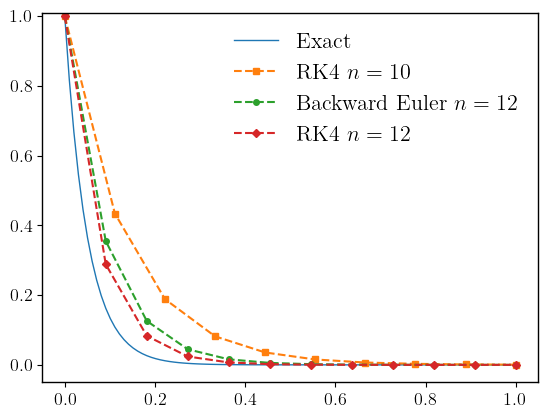

In [19]:
mu = -20 
f = lambda x, y: mu*y
fsol = lambda x: np.exp(mu*x)

a, b = 0, 1
y0 = 1.

xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label=r'Exact')

k = 0
markers = ['s', 'D']
for i in [10, 12]:
    data = [y0, a, b, i]
    
    if k==1:  # cambiar a 1
        xvalL, yvalL = LEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='o', markersize=4, label=r'Backward Euler $n=%d$'%i)
    
    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label=r'RK4 $n=%d$'%i)

    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.ylim(-0.05, 1.01)

- Segundo caso *[ecuación de Riccati](https://en.wikipedia.org/wiki/Riccati_equation)*

$$
y'(x)=-y(x)^2+\frac{2x}{1-x^2}y(x)-\frac{30}{1-x^2},\quad y(0.05)=19.53
$$

la solución analítica es:
$$
y=y_0+\Phi(x)\bigg[C-\int f(x) \Phi(x) dx\bigg]^{-1}
$$
donde $C$ es una constante arbitraria y
$$
\Phi(x)\equiv \exp\bigg\{\int [2 f(x) y_0+g(x)]dx\bigg\}
$$
las funciones $f(x), g(x), h(x)$ corresponden a los coeficientes que acompañan a $y^2, y^1, y^0$ respectivamente.

(-50.0, 21.0)

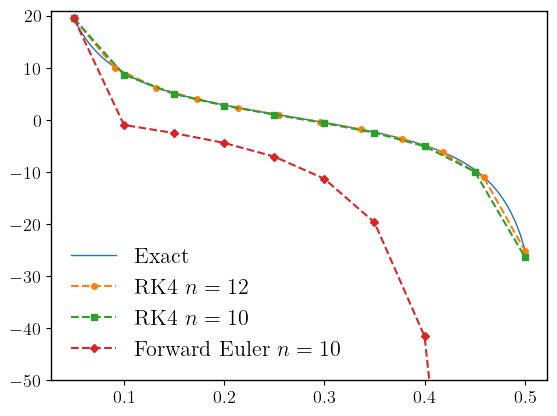

In [20]:
f = lambda x, y: -y**2+2*x*y/(1-x**2)-30/(1-x**2)
fsol = lambda x: (1.4591566243681633e6+x*(3.5873015873015874+x*(-2.1887349365522448e7+x*(-13.333333333333332+x*(5.107048185288571e7\
                +(10.-3.0642289111731425e7*x)*x))))+(-0.23809523809523808+3.5714285714285716*x**2-8.333333333333334*x**4+5.*x**6)*np.log(1.-1.*x)\
                +(0.23809523809523808-3.5714285714285716*x**2+8.333333333333334*x**4-5.*x**6)*np.log(1. + x))/((-1.+x)*(1.+x)*(0.13544973544973546\
                +x*(-1.459156624368163e6+x*(-1.5555555555555556+x*(6.809397580384762e6+(2.-6.128457822346285e6*x)*x)))\
                +x*(0.23809523809523808-1.1111111111111112*x**2+x**4)*np.log(1.-1.*x)+x*(-0.23809523809523808+1.1111111111111112*x**2\
                -1.*x**4)*np.log(1. + x)))

k = 0
markers = ['o', 's', 'D']
a, b = 0.05, 0.5
y0 = 19.53
xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label=r'Exact')

for i in [12, 10]:
    data = [y0, a, b, i]
    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label=r'RK4 $n=%d$'%i)
    
    if k==1:
        xvalL, yvalL = DEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='D', markersize=4, label=r'Forward Euler $n=%d$'%i)
       
    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.ylim(-50, 21)

Nótese que en ambos ejemplos RK4 parece ser muy robusto y estable. Aún cuando nos enfrentamos a problemas de estabilidad (primer caso), o ODE no lineales como el segundo caso. ¡¡PARECE PERFECTO!!

Sin embargo, esto es demasiado bueno para ser verdad. Se debe distinguir entre la estabilidad de un método dado y el mal condicionamiento de un problema dado. 
- Hay problemas `bien condicionados` que algunos métodos no logran resolver (decimos que son inestables) y otros métodos logran resolver (decimos que son estables). 

- Por otra parte, existen problemas `mal condicionados` que **NINGÚN** método puede esperar abordar de manera muy fructífera. 

- Entre estos dos extremos, hay problemas `levemente mal condicionados` que pueden ser difíciles de resolver incluso si se emplea un método generalmente estable.

El mal condicionamiento de una EDO se conoce como *stiffness* (rigidez): una EDO rígida hace que muchos métodos sean inestables. Cuantificar la rigidez en el caso general puede resultar bastante complicado. Veamos un ejemplo específico:

`Ejemplo 1`:
$$
y'(x)=501 e^x-500y(x)\quad y(0)=0
$$

La solución exacta es: $y=e^x-e^{-500x}$.

(-0.005, 0.16)

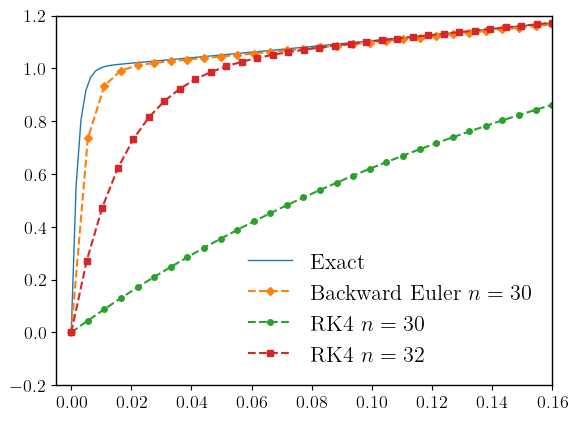

In [21]:
f = lambda x, y: 501*np.exp(x)-500*y
fsol = lambda x: np.exp(x)-np.exp(-500*x)

k = 0
markers = ['o', 's', 'D']
a, b = 0, 0.16
y0 = 0
xrange = np.linspace(a, b, 100)
plt.plot(xrange, fsol(xrange), ls='-', lw=1, label=r'Exact')

for i in [30, 32]:
    data = [y0, a, b, i]
    
    if k==0:
        xvalL, yvalL = LEuler(f, data)
        plt.plot(xvalL, yvalL, ls='--', marker='D', markersize=4, label=r'Backward Euler $n=%d$'%i)

    xvalD, yvalD = rk4(f, data)
    plt.plot(xvalD, yvalD, ls='--', marker=markers[k], markersize=4, label=r'RK4 $n=%d$'%i)
           
    k += 1

#plt.yscale('log')
plt.legend(loc='best', frameon=False)
plt.ylim(-0.2, 1.2)
plt.xlim(-0.005, 0.16)

El problema anterior nos pone fin al triunfalismo que habíamos tenido respecto al RK4. De manera general siempre hemos de tener cuidado a la hora de realizar el estudio numérico de una EDO.

`Comentario:` Los códigos más actuales de RK4 con paso adaptativo local, utilizan una combinación de RK5 y RK4 como forma de cuantificar el error local, en lugar de los cálculos de un solo paso y de dos pasos empleados anteriormente.

## Sistemas de EDO

Hasta ahora nos hemos centrado en problemas del valore inicial para EDO de orden uno. Sin embargo, y como vimos al inició de esta lectura pueden existir EDO de orden superior. Tales sistemas pueden ser reducidos a un sistema de EDO de primer orden.

### EDO de segundo Orden

En el ámbito científico las ecuaciones que más se suelen resolver son de segundo orden (ya se discutió el porque de ello). A continuación emplearemos todo lo visto anteriormente para resolver numéricamente este tipo de problemas numéricos, pero para ello debemos primero convertir la EDO en un sistema tipo:
<center><img src="capturas/199.png"></center>

donde ahora tendremos dos funciones independientes $y_0(x)$, $y_1(x)$.

**Reducción de orden de la EDO**

Consideremos la EDO siguiente:
$$
w''=f(x, w, w'),\quad w(a)=c,\quad w'(a)=d
$$

como se aprecia, las condiciones iniciales se dan enel mismo punto $x=a$, y por tanto estamos ante un problema de valor inicial. Si realizamos el siguiente cambio de variables
$$
y^{(0)}(x)=w(x),\quad y^{(1)}(x)=w'(x)=y^{(0)}{}'(x)
$$
tendremos que la EDo se podría escribir como:
<center><img src="capturas/200.png"></center>

lo cual, puede ser resuelto usando cualquiera de las metodologías vistas para elcaso de EDO de primer orden. En el caso de RK4, lo que tendremos es lo siguiente 
$$
y^{(0)}_{j+1}=y^{(0)}_{j}+\frac{1}{6}(k^{(0)}_0+2k^{(0)}_1+2k^{(0)}_2+k^{(0)}_3)
$$
$$
y^{(1)}_{j+1}=y^{(1)}_{j}+\frac{1}{6}(k^{(1)}_0+2k^{(1)}_1+2k^{(1)}_2+k^{(1)}_3)
$$

donde ahora tendremos que computar las funciones $k^{(0, 1)}_i$ para cada caso como:
\begin{align}
k^{(0, 1)}_0 &= h f^{(0, 1)}\left(x_j, y^{(0)}_j, y^{(1)}_j\right)\\
k^{(0, 1)}_1 &= h f^{(0, 1)}\left(x_j+\frac{h}{2}, y^{(0)}_j+\frac{k^{(0, 1)}_0}{2}, y^{(1)}_j+\frac{k^{(0, 1)}_0}{2}\right)\\
k^{(0, 1)}_2 &= h f^{(0, 1)}\left(x_j+\frac{h}{2}, y^{(0)}_j+\frac{k^{(0, 1)}_1}{2}, y^{(1)}_j+\frac{k^{(0, 1)}_1}{2}\right)\\
k^{(0, 1)}_3 &= h f^{(0, 1)}\left(x_j+h, y^{(0)}_j+k^{(0, 1)}_2, y^{(1)}_j+k^{(0, 1)}_2\right)
\end{align} 

Notar que el super índice $(0, 1)$ indica que función $f$ o $k_{i}$ utilizaremos.

### EDO de Orden arbitrario

A continuación generalicemos la metodología anterior para un sistema de orden $\nu$. De manera directa uno puede notar que la notación pasaría a ser vectorial, es decir
<center><img src="capturas/201.png"></center>

lo que en forma compacta se puede escribir como:
<center><img src="capturas/202.png"></center>

De manera similar al caso anterior. Podemos generalizar cualquier método de resolución visto. Para el caso de RK4, tendremos que 
<center><img src="capturas/203.png"></center>

lo cual es muy facil de implementar utilizando las ventajas de numpy.

In [22]:
# Implementacion
def RK4Met(func, data, arg=None):
    """
    func -> (x, yval, a, b, ..) donde a, b, .. son argumentos que se han de pasar como listas a la variable arg
    """
    if arg:
        f = lambda x, yv: np.array(func(x, yv, *arg))
    else:
        f = lambda x, yv: np.array(func(x, yv))
    xval, yval = rk4Gene(f, data)
    
    return xval, yval
    

def rk4Gene(f, data):
    y0v, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    nEq = len(y0v)
    yval = np.zeros((npt, nEq))  # crea una matriz (npt, nEq)
    
    yv = np.copy(y0v)
    for j, xi in enumerate(xval):
        yval[j, :] = yv
        k0 = h*f(xi, yv)  # importante como se define la función, tiene que ser de la forma f(x, yv) donde yv=[y0, y1, ...]
        k1 = h*f(xi+h/2, yv+k0/2)
        k2 = h*f(xi+h/2, yv+k1/2)
        k3 = h*f(xi+h, yv+k2)
        yv = yv + (k0 + 2*k1 + 2*k2 + k3)/6
        #yv += (k0 + 2*k1 + 2*k2 + k3)/6
           
    return xval, yval

**Ejemplo:** Resuleva numéricamente las ecuaciones de [Lotka-Volterra](https://es.wikipedia.org/wiki/Ecuaciones_de_Lotka-Volterra) que describen el comportamiento de dos especies. Una de ellas depredadora de la otra. Este modelo viene dado por el sistema de EDO:
\begin{align}
x'(t) = a x - b x y, \quad x(t_0)=x_0\\
y'(t) = -c y +d x y, \quad y(t_0)=y_0
\end{align}

donde $x(t)$ representa el número de presas que hay a un timepo $t$, mientras que $y(t)$ el número de depredaddores a ese tiempo. El comportamiento específico del sistema dependerá de la relación entre los parámetros positivos $a, b, c, d$ que representan lainteracción entre las dos especies.

In [23]:
# implementación

def fs(x, yv, a, b, c, d):  # x->t .  y0, y1 -> x, y 
    y0, y1 = yv 
    
    f0 = a*y0-b*y0*y1
    f1 = -c*y1+d*y0*y1
    return [f0, f1]

y0, y1 = 10, 15
y0v = [y0, y1]

t0, tf = 0, 25
npt = 200
data = [y0v, t0, tf, npt]

a, b, c, d = 1.2, 0.08, 0.5, 0.2
x, y = RK4Met(fs, data, arg=[a, b, c, d])  # recordar que y[j, :] donde j es presas, depredador

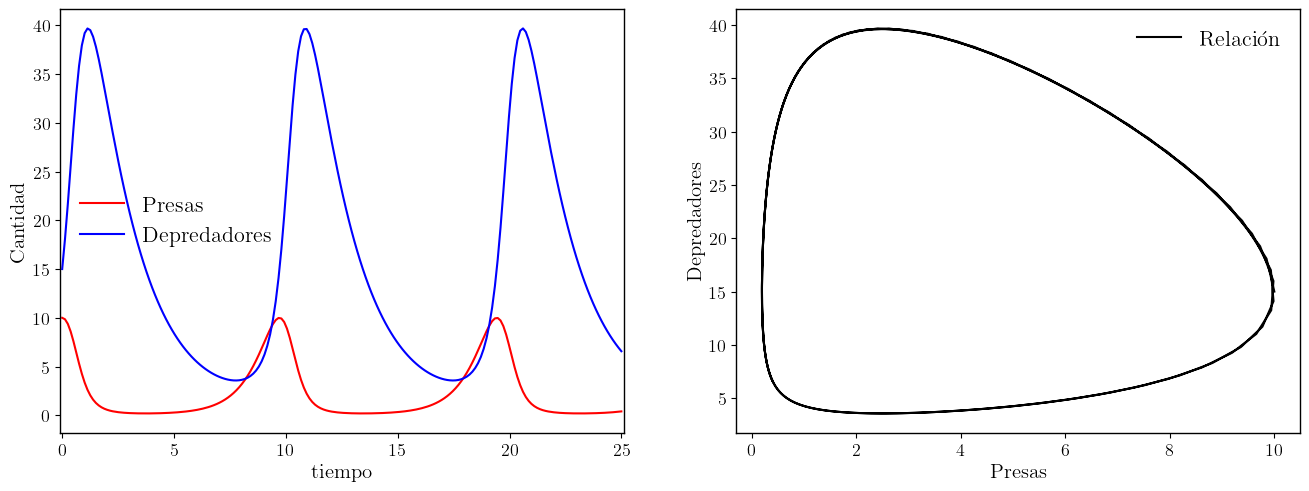

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(x, y[:, 0], c='red', label=r'Presas')
ax[0].plot(x, y[:, 1], c='blue', label=r'Depredadores')

ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('Cantidad')
ax[0].legend(frameon=False)

ax[0].set_xlim(t0-0.1, tf+0.1)

############

ax[1].plot(y[:, 0], y[:, 1], c='k', label='Relación')

ax[1].set_xlabel('Presas')
ax[1].set_ylabel('Depredadores')
ax[1].legend(frameon=False)


Veamos otro ejemplo, el [Péndulo doble](https://es.wikipedia.org/wiki/Péndulo_doble)

In [25]:
def rk5Gene(f, data):
    """
    Implementacion del metodo de  Runge Kutta de orden 5

    In:
    func -> Sistema de EDO, debe tener la estructura:
            (x, yval, a, b, ..) donde a, b, .. son argumentos que se han de pasar como listas a la variable arg
    
    data -> Es una lista [y0v, a, b, npt] que proporciona la información necesaria para la implementación del RK donde
            y0v ->  es una lista con las condiciones de frontera en r=a
            a, b -> rmin, rmax
            npt -> son los números de puntos usados para generar h = (b-a)/(npt-1)
    
    Out:
    xval -> un arreglo discreto de valores de ri, donde se itero  
    yval -> una lista de arreglos discretos correspondientes a las iteraciones con la misma estructura que y0v. Cada fila corresponde a un ri.
    """
    y0v, a, b, npt = data

    # h val
    h = (b-a)/(npt-1)
    xval = a + np.arange(npt)*h
    nEq = len(y0v)
    yval = np.zeros((npt, nEq))  # crea una matriz (npt, nEq)
    
    yv = np.copy(y0v)
    for j, xi in enumerate(xval):
        yval[j, :] = yv
        k0 = h*f(xi, yv)  # importante como se define la función, tiene que ser de la forma f(x, yv) donde yv=[y0, y1, ...]
        k1 = h*f(xi+h/4, yv+k0/4)
        k2 = h*f(xi+3*h/8, yv+3*k0/32+9*k1/32)
        k3 = h*f(xi+12/13*h, yv+1932*k0/2197-7200*k1/2197+7296*k2/2197)
        k4 = h*f(xi+h, yv+439*k0/216-8*k1+3680*k2/513-845*k3/4104)
        k5 = h*f(xi+h/2, yv-8*k0/27+2*k1-3544*k2/2565+1859*k3/4104-11*k4/40)
        yv = yv + 16*k0/135 + 6656*k2/12825 + 28561*k3/56430-9*k4/50 + 2*k5/55
    return xval, yval

def RKMet(func, data, arg=None, rk='rk5'):
    """
    Implementacion del metodo de  Runge Kutta de orden 4 y 5

    In:
    func -> Sistema de EDO, debe tener la estructura:
            (x, yval, a, b, ..) donde a, b, .. son argumentos que se han de pasar como listas a la variable arg
    
    data -> Es una lista [y0v, a, b, npt] que proporciona la información necesaria para la implementación del RK donde
            y0v ->  es una lista con las condiciones de frontera en r=a
            a, b -> rmin, rmax
            npt -> son los números de puntos usados para generar h = (b-a)/(npt-1)
    arg -> argumentos que se le pasarán al sistema de ecuaciones
    rk -> el método que se utilizará puede ser 'rk4' o 'rk5', por defecto está el 'rk5'

    Out:
    xval -> un arreglo discreto de valores de ri, donde se itero  
    yval -> una lista de arreglos discretos correspondientes a las iteraciones con la misma estructura que y0v. Cada fila corresponde a un ri.
    """
    if arg:
        f = lambda x, yv: np.array(func(x, yv, arg))
    else:
        f = lambda x, yv: np.array(func(x, yv))
    
    if rk == 'rk5':
        xval, yval = rk5Gene(f, data)
    else:
        xval, yval = rk4Gene(f, data)
    
    return xval, yval

In [26]:
# Ecuaciones del movimiento
def equations(t, y, arg):
    """
    [theta1, dtheta1/dt, theta2, dtheta2/dt] = [theta1, z1, theta2, z2] = y
    """
    m1, m2, g, L1, L2 = arg
    theta1, z1, theta2, z2 = y
    
    delta = theta1 - theta2

    denominator1 = L1*(2*m1 + m2 - m2*np.cos(2*delta)**2)
    denominator2 = (L2/L1)*denominator1

    # sistema
    dtheta1 = z1
    dz1 = (-(2*m1+m2)*g*np.sin(theta1) - m2*g*np.sin(theta1-2*theta2) + 2*np.sin(delta)*m2*(L2*z2**2+\
         z1**2*L1*np.cos(delta)))/denominator1
    dtheta2 = z2
    dz2 = (2*np.sin(delta)*(z1**2*L1*(m1+m2)+g*(m1+m2)*np.cos(theta1)+L2*z2**2*m2*np.cos(delta)))/denominator2
    return [dtheta1, dz1, dtheta2, dz2]

# Parámetros del péndulo doble
g = 9.81  # Gravedad (m/s^2)
L1, L2 = 1.0, 1.0  # Longitudes de las barras
m1, m2 = 1.0, 1.0  # Masas de los péndulos

arg = [m1, m2, g, L1, L2]

# Condiciones iniciales
theta1_0 = np.pi / 2  # Ángulo inicial del péndulo 1
theta2_0 = np.pi / 4  # Ángulo inicial del péndulo 2
z1_0 = 0.0  # Velocidad angular inicial del péndulo 1
z2_0 = 0.0  # Velocidad angular inicial del péndulo 2

# Vector de condiciones iniciales
y0 = [theta1_0, z1_0, theta2_0, z2_0]

# Tiempo de simulación
t_span = [0, 2]

# Resolver las ecuaciones diferenciales
# from scipy.integrate import solve_ivp
# t_eval = np.linspace(t_span[0], t_span[1], 1000)
# sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

npt = 1000
data = [y0, t_span[0], t_span[1], npt]

tval, yval = RKMet(equations, data, arg=arg, rk='rk5')

# Extraer las soluciones
# theta1 = sol.y[0]
# theta2 = sol.y[2]
theta1 = yval[:, 0]
theta2 = yval[:, 2]

# Convertir los ángulos a coordenadas cartesianas
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

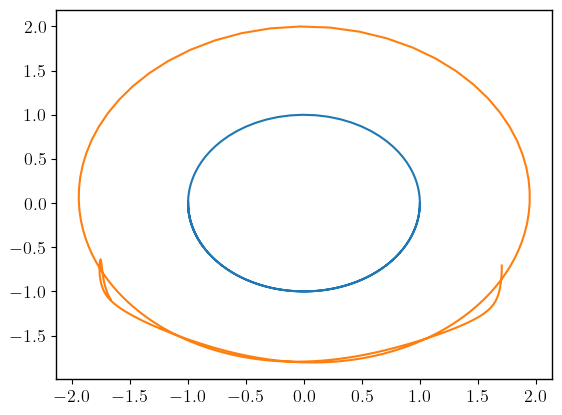

In [27]:
plt.plot(x1, y1)
plt.plot(x2, y2)

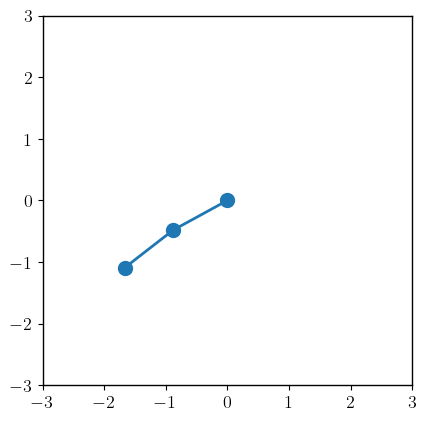

In [28]:
import matplotlib.animation as animation
import matplotlib

from IPython.display import HTML

# matplotlib.rcParams['animation.embed_limit'] = 2**128

### Animación
fig, ax = plt.subplots()
ax.set_xlim(-1.5*(L1 + L2), 1.5*(L1 + L2))
ax.set_ylim(-1.5*(L1 + L2), 1.5*(L1 + L2))
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([], [])
    return line,

def update(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    line.set_data(thisx, thisy)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(tval),
                              init_func=init, blit=True, interval=25)

# Guardar la animación en un archivo de video
ani.save('pendulo_doble.mp4', fps=180)

# reproducir en notebook
# HTML(ani.to_jshtml())

## Problemas del Valor en la frontera (Boundary-Value Problems)

Hasta ahora nos hemos enfocado en tratar los problems tipo Valor inicial, sin embargo, como fue comentado al inicio de esta conferencia podemos enfrentarnos a un problema de valores como condiciones de frontera:
$$
y''= f(x, y, y'),\quad y(a)=c, \quad y(b)=d.
$$
donde las cantidades $y(a)=c, \quad y(b)$ son los valores en la frontera. Como se aprecia, no conocemos el valor de la derivada en uno de los puntos, por ejemplo $y'(a)=¿?$. Este desconocimiento nos impide emplear todo lo visto hasta ahora. 

Entonces, ¿cómo podemos abordar este problema?

#### Método de Shooting 

El problema de los valores a la frontera no es un problema del valor inicial debido a que desconocemos el valor de $y'(a)$ (la información necesaria para comenzar a integrar desde $a$). Sin embargo, podemos reducir nuestra situación a un problema de valor incial si *adivinamos* el valor de $y'(a)$. No se asusten, en verdad no adivinamos el valor, sino que empezamos a probar diferentes valores de tal forma que en uno de esos *disparos* (shooting) demos en el blanco y obtengamos el valor $y(b)=d$. El obtenerlo nos garantizaría partir de una condición inicial para $y'(a)$ acorde a los valores en la frontera.

<center><img src="capturas/204.png"></center>

Aunque en la figura anterior le atinamos en tres intentos, la realidad es que es extremadamente improbable que una suposición aleatoria pueda satisfacer la condición de frontera $y(b)$. Sin embargo, para funciones bien comportadas podemos utilizar ideas similares al método de Bisección o algún otro método de busqueda de raices.

Intentemos reformular la prescripción anterior de una manera más sistemática. Supongamos que nuestra entrada es $w(a) = c$ y $w(b) = d$. Esto se traduciría a $w_0 = c$ y $w_{n−1} = d$, con nuestra incógnita es $w'{}_0$ (w'(a)). Partiendo de un supuesto valor conocido $\sigma$, es decir, $w'{}_0=\sigma$, podemos entonces resolver la EDO usando uno de los métodos vistos anteriormente y obtener $w_{n−1}$. En otras palabras, se ha de programar una función shoot que internamente use un método para resolver la EDO, pero que tenga como parámetro de entrada el valor para $\sigma$ el cual será escogído por algúno de los métodos de busqueda de raices, donde ahora la igualdad será con $w_{n−1} = d$, es decir
$$
g(\sigma)=d
$$
donde $g$ no es una función analítica conocida, es el resultado de llevar a cabo una solución completa del problema con valores iniciales desde $a$ hasta $b$.

In [29]:
# implementación
def shoot(func, sig, y0, x0, xf, yf, npt, arg=None): 
    y0v = [y0, sig]  # notar que la derivada es la segunda
    data = [y0v, x0, xf, npt]   
    _, ys = RK4Met(func, data, arg=arg)
    #print(ys[-1, 0]-yf, ' ', ys[-1, 0], yf, sig)
    return ys[-1, 0]-yf

def shooting(func, datos, arg=None, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    sig, y0, yf, x0, xf, npt = datos
    sol2 = lambda sig: shoot(func, sig, y0, x0, xf, yf, npt, arg=arg)
    #yder = Bis(sol2, inter, Nit=Nit, error='dist', eps=eps)
    yder = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv) 
    return yder

In [30]:
y0, sig = 10, 8  # y1=15
yf = 0.4049995541328063
x0, xf = 0, 25
npt = 200
datos = [sig, y0, yf, x0, xf, npt]
derVal = shooting(fs, datos, arg=[a, b, c, d], inter=[0, 20], Nit=1000, Ndiv=100, eps=1e-08)  #[10, 22]
derVal

[0.01992976424669978,
 1.0895045778968115,
 3.5923658898382476,
 15.0,
 17.333714149215005]

In [31]:
# Como se aprecia hay mas de una posible solución para obtener el valor y[b]
# lo anterior ocurre pq el sistema es no lineal.
# Comparemos nuestro resultado anterior con alguna de las condiciones iniciales encontradas
y0, y1 = 10, derVal[4]
y0v = [y0, y1]

t0, tf = 0, 25
npt = 200
data = [y0v, t0, tf, npt]

a, b, c, d = 1.2, 0.08, 0.5, 0.2
x, y = RK4Met(fs, data, arg=[a, b, c, d])  # recordar que y[j, :] donde j es presas, depredador

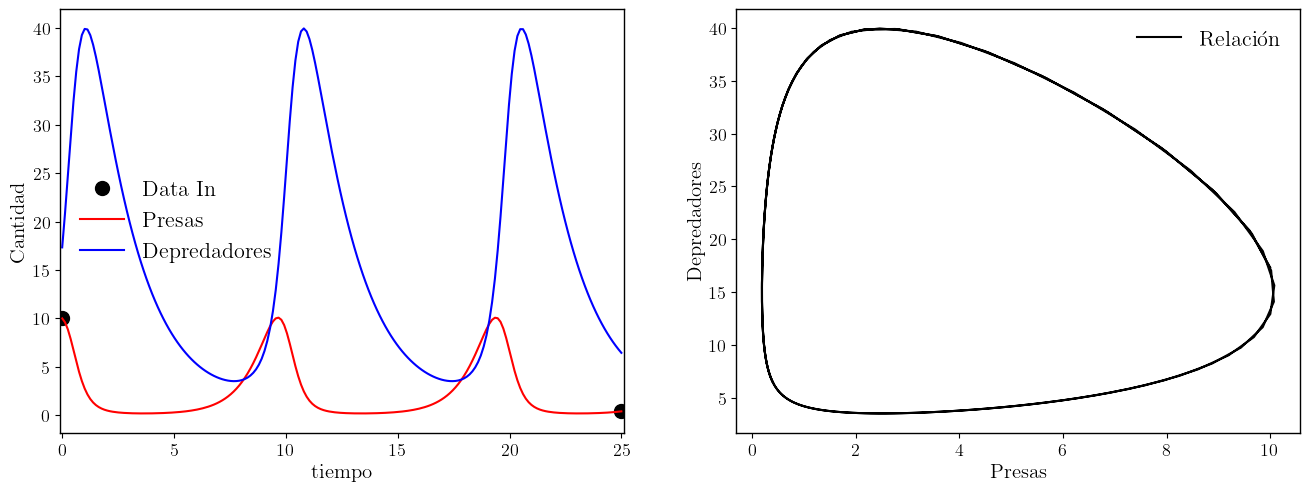

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot([t0, tf], [y0, yf], 'ko', label=r'Data In')
ax[0].plot(x, y[:, 0], c='red', label=r'Presas')
ax[0].plot(x, y[:, 1], c='blue', label=r'Depredadores')

ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('Cantidad')
ax[0].legend(frameon=False)

ax[0].set_xlim(t0-0.1, tf+0.1)

############

ax[1].plot(y[:, 0], y[:, 1], c='k', label='Relación')

ax[1].set_xlabel('Presas')
ax[1].set_ylabel('Depredadores')
ax[1].legend(frameon=False)

#### Método de Matricial (método de diferencia finita) 

Como vimos anteriormente el método de Shooting es un método aproximado y aunque puede garantizar buenos resultados no resuelve el sistema en sí. En adición, la EDO de segundo orden debe ser reescrita como un sistema de primer orden. A continuación veremos un método que nos permite resolver tal cual la ecuación haciendo uso de las condiciones a la fronteras específicas.

Como sabemos el problema a resolver es:
$$
w''=f(x, w, w'), \quad w(a)=c,\quad w(b)=d
$$

Ahora, si aplicamos la fórmula de diferencia central para la primera y segunda derivada (recordar)

<center><img src="capturas/205.png"></center>

Pordemos escribir la EDO de segundo orden como:

<center><img src="capturas/206.png"></center>

Notar que en este caso tenemos como incógnitas solo las $w_j$. Veamos ahora con un ejemplo como implementarlo.

Considere la siguiente EDO de segundo orden:
$$
w(x)''=f(x, w, w')
$$
donde 
<center><img src="capturas/207.png"></center>

Si discretizamos aplicando el método de diferencia finitas (la expresión anterior), tendremos que:

<center><img src="capturas/208.png"></center>

donde como se aprecia la primera línea estaría relacionada con las $w_{j-1}, w_j$ y $w_{j+1}$. Mientras que la segunda sería simplemente $w_0, w_j$. Las expresiones anteriores se pueden acomodar de tal forma que aparezcan ''organizadas'' las $w$

<center><img src="capturas/209.png"></center>

donde 

<center><img src="capturas/210.png"></center>

¿Ya es evidente que lo anterior lo podemos escribir como una matriz?

Noten que podemos definir un vector $W$, y una matriz $A$ que corresponda a los coeficientes discretos $\alpha_j, \beta_j, \gamma_j$. Es decir:

<center><img src="capturas/211.png"></center>

Entonces para encontrar $W=\{w_0, w_i, ...., w_j\}^{T}$ solo debemos resolver
$$
A W = b \quad \to \quad W= A^{-1}b 
$$

`Notemos que:`
- Los coeficientes evaluados en las $x_j$ son diagonales, sin incluir la primera y última fila.
- A menos que la matriz sea singular, estaríamos resolviendo el sistema sin ninguna aproximación. Sin embargo, como veremos en futuras clases, el costo cumputacional de invertir la matriz puede ser considerable si $n$, el número de puntos usados lo es.

In [33]:
# implementación
def matriz(data, info=False):
    a, b, b0, bf, npt = data
    h = (b-a)/(npt-1)
    xi = a + np.arange(npt)*h
    
    # creando alpha, beta, gamma discretos
    denom = (1-xi**2)
    alphaj = 1 + h*xi/denom
    betaj = -2 + 30*h**2/denom
    gamma = 1 - h*xi/denom
    
    # Creando la matriz de dimensión n x n
    A = np.zeros((npt, npt))
    np.fill_diagonal(A[:, :], betaj)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:-1, :], alphaj[1:])  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:, 2:], gamma[1:])  # recordar que no incluye el x_0
    A[0, 0] = 1
    A[-1,-1] = 1
    
    # creando vector B
    bs = np.zeros(npt)
    bs[0] = b0
    bs[-1] = bf
    
    if info:
        print(alphaj[1], betaj[1], gamma[1])
        print(alphaj[-2], betaj[-2], gamma[-2])
        print(A)

    return A, bs, xi

In [34]:
a, b, b0, bf, npt = 0.05, 0.49, 0.0926587109375, 0.11177050858750004, 400
data =  [a, b, b0, bf, npt]
A, bs, xi = matriz(data, info=False)
invA = np.linalg.inv(A)  # A^{-1}
W = np.dot(invA, bs)  # W=A^{-1} b

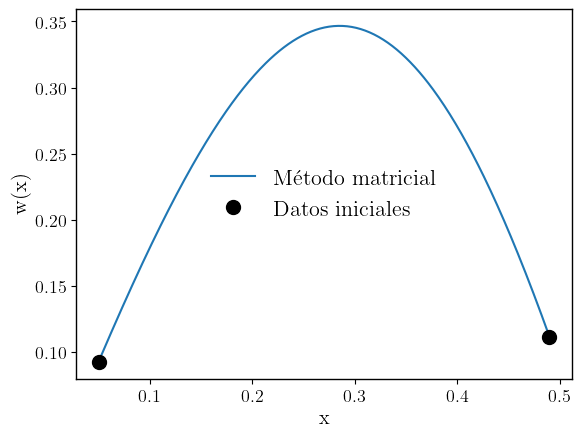

In [35]:
# graficando el resultado
plt.plot(xi, W, label=r'Método matricial')
plt.plot([a, b], [b0, bf], ls='', c='k', marker='o', label=r'Datos iniciales')
plt.xlabel(r'x')
plt.ylabel(r'w(x)')
plt.legend(frameon=False)

**Comentarios**

Para información sobre `np.fill_diagonal` [checar](https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html)

In [36]:
# Ejemplo de funcionamiento de fill_diagonal:
n = 6
A = np.zeros((n, n))

np.fill_diagonal(A[:, :], 1)
np.fill_diagonal(A[1:-1, :], 2)
np.fill_diagonal(A[1:, 2:], 3)

A

array([[1., 0., 0., 0., 0., 0.],
       [2., 1., 3., 0., 0., 0.],
       [0., 2., 1., 3., 0., 0.],
       [0., 0., 2., 1., 3., 0.],
       [0., 0., 0., 2., 1., 3.],
       [0., 0., 0., 0., 0., 1.]])

In [37]:
# Obteniendo la condición inicial mediante la metodología de shooting
def fs(x, yv):  # x->t .  y0, y1 -> x, y 
    y0, y1 = yv 
    
    f0 = y1
    f1 = -30*y0/(1-x**2)+2*x*y1/(1-x**2)
    return [f0, f1]

sig = 2.
a, b, b0, bf, npt = 0.05, 0.49, 0.0926587109375, 0.11177050858750004, 400
datos = [sig, b0, bf, a, b, npt]
wP0 = shooting(fs, datos, inter=[0, 20], Nit=1000, Ndiv=100, eps=1e-08)  # valor de la derivada en el origen

In [38]:
# resolviendo RK4
y0v = [b0, wP0[0]]
data = [y0v, a, b, npt]

x, y = RK4Met(fs, data) 

Text(0, 0.5, 'w(x)')

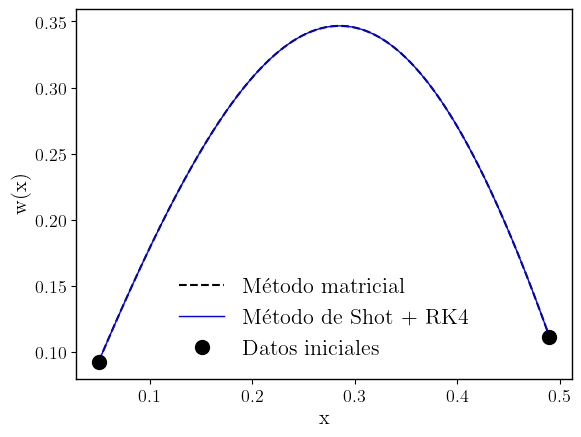

In [39]:
# Graficando el resultado obtenido usando ambs metodologías

plt.plot(xi, W, '--k', label=r'Método matricial')
plt.plot(x, y[:,0], 'b-', lw=1, label=r'Método de Shot + RK4')
plt.plot([a, b], [b0, bf], 'ko', label=r'Datos iniciales')
plt.legend(frameon=False)
plt.xlabel(r'x')
plt.ylabel(r'w(x)')

## Problemas de autovalores

Veamos ahora una subclase de problemas de valores en la frontera. En este caso a parte de los términos usuales ($x, w(x), w'(x), w''(x)$) aparece otro parámetro $s$, conocido como valor propio. La estructura sería la siguiente:
$$
w''=f(x, w, w'; s),\quad w(a)=c, w(b)=d
$$

Notar que tiene la misma estructura anterior, con la única diferencia es la presencia de $s$. `Esto significa que no estamos ante una única ecuación diferencial, sino una familia de EDO`.

Ahora, puede ocurrir que para algunos valores dados de $s$ no haya solución para la EDO correspondiente; por lo tanto, tendremos que calcular los valores *interesantes* de $s$ (es decir, los que conducen a una solución) además de producir una aproximación a $w(x)$. Consideremos los casos con la estructura:
$$
w''(x)=\chi(x) w'(x)+\eta(x) w(x)+\theta(x) s w(x)
$$
donde las funciones $\chi(x), \eta(x), \theta(x)$ son conocidas. `En el caso que se pongan condiciones homogéneas a la frontera, este problema se reduce Sturm-Liouville`.

Para resolver la EDO anterior hemos de hacer uso de los métodos vistos anteriormente para el problema de la frontera (shooting y matricial). A continuación estudiaremos la ecuación de *Mathieu*, que aparece en el estudio de las vibraciones de las cuerdas y en muchos otros temas de física. Este ejemplo servirá para comprender cómo emplear los métodos anteriores en la resolución de este tipo de EDO:
$$
w''(x)=[2q \cos(2x)-s]w(x), \quad w(0)=w(2\pi)
$$

Notar que las condiciones de frontera indican es que la solución es períodica (algo que se puede inferir de la presencia de la función coseno). Por otro lado, el parámetro $s$ será la incógnita a encontrar de tal forma que conduzcan a soluciones no triviales (es decir, distintas de cero) para $w(x)$. Y el conjunto de sus valores representaría un espectro de soluciones. El parámetro $q$ determina la fuerza del término coseno y se mantendrá fijo (en un valor finito) en lo que sigue. 

`Pregunta:` ¿Que ecuación queda si $q=0$?

#### Usando Shooting

Anteriormente vimos que podíamos usar el método de shooting para encontrar la condicion $w'(a)$ que nos permitiera satisfacer los valores de $w$ en la frontera. Ahora, uno pensaría que tendríamos que usar este método para aplicar un *doble shooting*, uno que nos encuentre el valor de $s$ y otro que encuentre el valor de $w'$. Bueno, no necesariamente, veamos que ocurre en este tipo de EDO.

Analicemos la ecuación, ¿notan algo? Qué creen que ocurra si cambiamos $w(x)=\alpha \tilde w(x)$, ¡la EDO sigue siendo la misma! Es decir, la EDO es lineal en $w$ y tiene esa libertad de escalamiento, lo que significa que si $w(x)$ es una solución, entonces tambien $\alpha w(x)$ lo será. Por otro lado analicemos la expresión para los valores en la frontera (pongamoslo de forma general):
$$
w(a)=w(b)=cte.
$$
como se aprecia también la misma libertad de escalamiento $\alpha w(a)= \alpha w(b)=cte$. 

¿Qué implica esta libertad de escalimento?

Pues resumiendo implica que el considerar diferentes valores $w'(a)$ no cambia la solución, solo la reescala, como se aprecia en la figura:

<center><img src="capturas/212.png"></center>

se consideró $q=1.5, s=4.25$.

Lo anterior se puede deducir del siguiente razonamiento lógico:  $\alpha w(x)$ para $x=a$, tendrémos entonces que $\alpha w'(a)$, lo que implica que $\alpha$ solo normaliza la solución. Por ejemplo, en la figura el perfil obtenido para $w'(0)=1.5$, corresponde al obtenido para $w'(0)=1.0$ con un escalamiento $\alpha=1.5$.

Resumiendo, el valor de $w'(a)$ no juega un rol importante en el shooting, si encontramos una solución $w$, las demás serán un escalamiento de esta. Por tanto es el parámetro $s$ quien mediante su variación nos permitirá satisfacer las condiciones de frontera.

Text(0.5, 0, 'x')

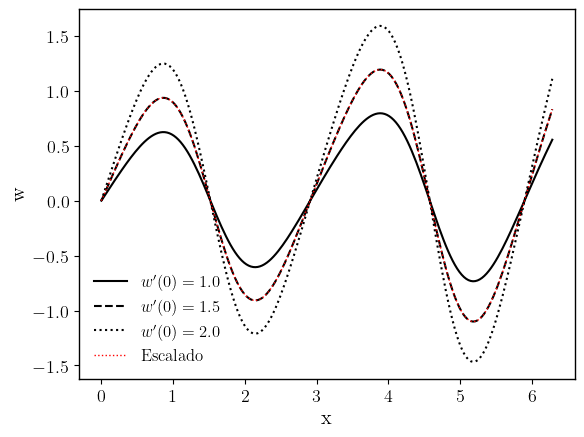

In [40]:
# Veamos el escalamiento
def fs(x, yvals, s): 
    q = 1.5
    y0, y1 = yvals
    f0 = y1
    f1 = (2*q*np.cos(2*x) - s)*y0 
    return [f0, f1]

s = 4.25
x0, xf = 0, 2*np.pi
npt = 200
k = 0
Ls = ['-', '--', ':']
for i in [1, 1.5, 2]:
    y0v = [0, i]
    data = [y0v, x0, xf, npt]
    x, y = RK4Met(fs, data, arg=[s])
    plt.plot(x, y[:,0], ls=Ls[k], c='k', label=r'$w^{\prime}(0)=%3.1f$'%i)
    k += 1

# escalemos el último para llegar al primer
alp = 1.5/2
plt.plot(x, y[:,0]*alp, c='r', ls=':', lw=1, label=r'Escalado')
  
plt.legend(loc='lower left', frameon=False, fontsize=12)
plt.ylabel('w')
plt.xlabel('x')

Notar que lo que debemos hacer es fijar un valor no nulo para $\omega'(a)$ y hacer el shooting sobre $s$ y que luego cualquiera otra solución $w(x)$ se podría obtener de escalar la obtenida luego del shooting.

In [41]:
# implementación NOTAR QUE ADAPTÉ LEVEMENTE LOS ANTERIORES
def shootS(func, s, dy0, y0, x0, xf, yf, npt): 
    y0v = [y0, dy0]
    data = [y0v, x0, xf, npt]   
    _, ys = RK4Met(func, data, arg=[s])
    #print(ys[-1, 0]-yf, ' ', ys[-1, 0], yf, sig)
    return ys[-1, 0]-yf

def shootingS(func, datos, arg=None, inter=[-1e10, 1e10], Nit=1000, Ndiv=100, eps=1e-05):
    dy0, y0, yf, x0, xf, npt = datos
    sol2 = lambda s: shootS(func, s, dy0, y0, x0, xf, yf, npt)
    #yder = Bis(sol2, inter, Nit=Nit, error='dist', eps=eps)
    yder = roo_Bis(sol2, inter, Nit=Nit, error='dist', eps=eps, Ndiv=Ndiv) 
    return yder

In [42]:
def fs(x, yvals, s): 
    q = 1.5  # podemos intentar ponerlo también como parámetro
    y0, y1 = yvals
    f0 = y1
    f1 = (2*q*np.cos(2*x) - s)*y0 
    return [f0, f1]

# Pongamos las condiciones de frontera homogeneas
dy0 = 1.  # provemos con otro valor 5 por ejemplo
a, b, b0, bf, npt = 0., 2*np.pi, 0, 0, 400
datos = [dy0, b0, bf, a, b, npt]
Inter = [-1, 10]  # intervalo donde buscaremos el espectro
wP0 = shootingS(fs, datos, inter=Inter, Nit=1000, Ndiv=100, eps=1e-08)  # valor de la derivada en el origen, aumentar Ndiv
wP0

[-0.8426695730951097,
 -0.7332651416460674,
 2.7279738518926844,
 3.814290980497996,
 6.477781845463646,
 9.092609266440075]

(0.0, 1.0)

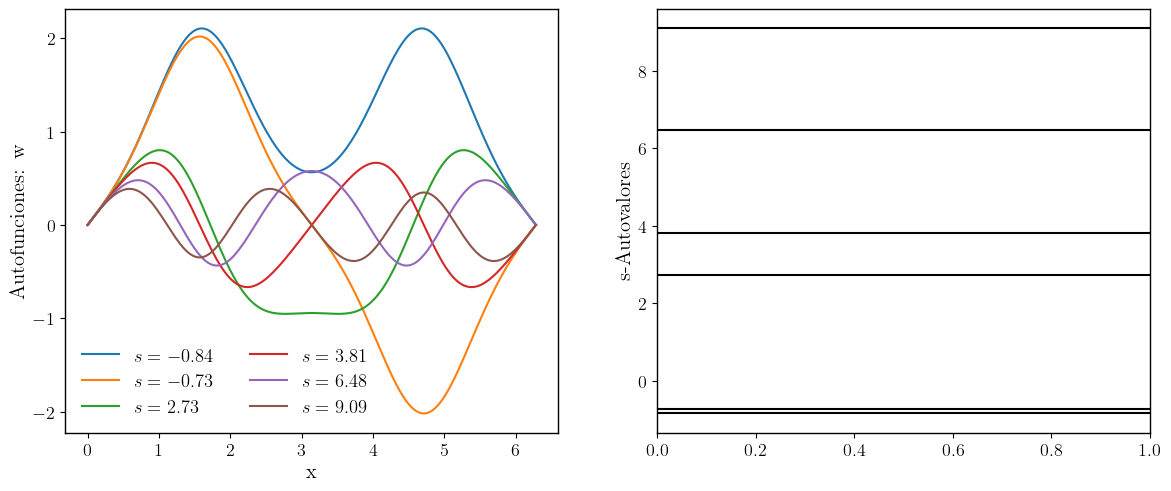

In [43]:
x0, xf = 0, 2*np.pi
npt = 200
y0v = [0, 1]  # fijamos w'=1
data = [y0v, x0, xf, npt]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))
k = 0
for i in wP0:
    x, y = RK4Met(fs, data, arg=[i])
    ax[0].plot(x, y[:,0], label=r'$s=%3.2f$'%i)
    k += 1
  
ax[0].legend(frameon=False, ncols=2, fontsize='small')
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in wP0:
    ax[1].hlines(y=i, xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)

### Implementación matricial

A continuación emplemos a nuestro problema:
<center><img src="capturas/215.png"></center>

la metodología *Matricial*. Notemos que debido a la condición de frontera los puntos discretos satisfacen: 
<center><img src="capturas/214.png"></center>

es decir, son periódico, por lo que es adecuado usar un generador de la forma 
<center><img src="capturas/216.png"></center>

Aproximando las derivadas usando la diferencia central tendremos:
<center><img src="capturas/217.png"></center>

lo que nos conduce a:
<center><img src="capturas/218.png"></center>

donde 
<center><img src="capturas/219.png"></center>

`Notemos varios detalles:`
- En la ecuación discreta aparece el parámetro $s$ a la derecha, multiplicando a $h w_i$. ¿Notan similitud a un problema de autovalores $A W=s W$?
- En este caso a diferencia del anterior incluimos $j=0, j=n-1$. Lo anterior puede entenderse de nuestro espaciado, como se aprecia $x_n=2\pi$, mientras que $x_{n-1}$ es antes, es decir:
<center><img src="capturas/220.png"></center>

- Por último nótese que como tenemos un problema de autovalores NO necesitamos conocer los valores de $w_0, w_{n-1}$, solo saber que $w_0=w_n$ (períodicidad). Al resolver el problema de autovalores encontraremos tanto el autovalor, como el autovector asociado, y como veremos eso es una ventaja.

Finalmente tendremos que nuestra matriz queda como:
<center><img src="capturas/221.png"></center>

lo cual no es más que un problema de autovalores
<center><img src="capturas/222.png"></center>

que nos permitirá encontrar tantos autovalores como la dimensión de la matriz.

In [44]:
# implementación
def matriz2(data, info=False, q=1.5):
    a, b, npt = data
    h = (b-a)/(npt-1)  # h = 2*np.pi/npt equivale a tomar a=0, b=2pi, npt-1=N
    xi = a + np.arange(npt)*h  # np.arange(npt)*h
    
    # creando alpha, beta, gamma discretos
    alphaj = -2-2*h**2*q*np.cos(2*xi)
    
    # Creando la matriz de dimensión n x n
    A = np.zeros((npt, npt))
    np.fill_diagonal(A[:, :], alphaj)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:-1, :], 1)  # recordar que no incluye el x_0
    np.fill_diagonal(A[1:, 2:], 1)  # recordar que no incluye el x_0
    A[0, -1] = 1
    A[0,-1] = 1
    
    if info:
        print(A)

    return A, xi, h

Usaremos [eig](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html) de la librería `Scipy`

In [45]:
from scipy.linalg import eig

# Construyendo la matriz
a, b, npt = 0, 2*np.pi, 400+1
data = a, b, npt
A, xi, h = matriz2(data, info=False, q=1.5)

# Obtenemos los autovalores y los autovectores
# derechos usando scipy.linalg.eig
lEnig1, V1 = eig(A)

# Comprobando que los autovalores y autovectores son la solución del
# sistema Ax=Lx
test = []
for i in range(npt):
    ntest = np.allclose(A@V1[:, i]-(lEnig1[i]*V1[:, i]), np.zeros(npt, dtype=complex))
    test.append(ntest)
test = np.array(test)
print('Comprobando que se cumple Ax=Lx ->', test)
    

# Obteniendo la s verdadera
sEng = -np.copy(lEnig1)/h**2  # Lambda = -h^2 s
    
# Organizando de menor a mayor los autovalores
ii = np.argsort(sEng)  # devuelve los indices 
sEngF2 = sEng[ii] # ordenando los autovalores
VF1 = V1[:, ii]  # ordenando los autovectores

Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [46]:
print('Los primero 10 Autovalores son \n', sEngF2[:10])

Los primero 10 Autovalores son 
 [-0.84272952+0.j -0.73332559+0.j  2.72780256-0.j  3.81388651-0.j
  6.47694756-0.j  9.09088441-0.j 12.34786266-0.j 16.06787525-0.j
 20.30011741-0.j 25.0340035 -0.j]


In [47]:
## comparar con los obtenidos por shooting
[-0.8426695730951097,
 -0.7332651416460674,
 2.7279738518926844,
 3.814290980497996,
 6.477781845463646,
 9.092609266440075]

[-0.8426695730951097,
 -0.7332651416460674,
 2.7279738518926844,
 3.814290980497996,
 6.477781845463646,
 9.092609266440075]

/var/folders/mf/vfyq6zyn4l35gfd2kgq4k2q00000gn/T/ipykernel_4587/2557340788.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[0].plot(xi, y, label=r'$s=%3.2f$'%sEngF2[i])
/opt/anaconda3/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


(0.0, 1.0)

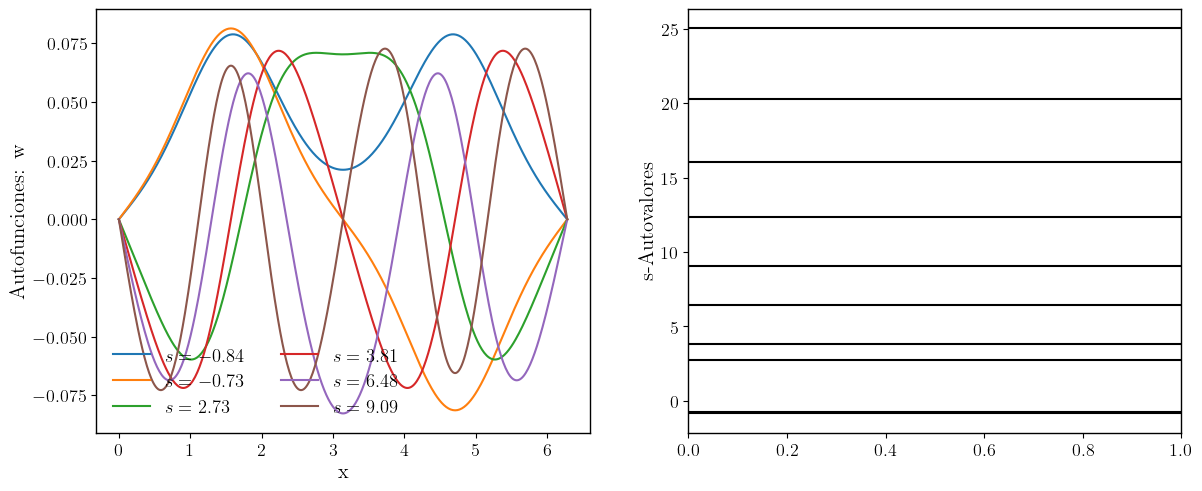

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))

for i in range(6):
    y = VF1[:, i]
    ax[0].plot(xi, y, label=r'$s=%3.2f$'%sEngF2[i])

  
ax[0].legend(loc='lower left', frameon=False, fontsize='small', ncols=2)
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in range(10):
    ax[1].hlines(y=sEngF2[i], xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)

### Métodos espectrales

### Ecuaciones diferenciales con derivadas parciales